# Prathmesh Deshmukh 

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


Importing Dataset from url 

In [2]:
##url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
##df=pd.read_csv(url)

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [27]:
df.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X=df["Hours"]
y=df["Scores"]

## plotting the points Scores vs Time 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x720 with 0 Axes>

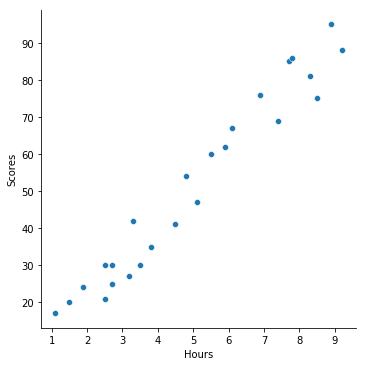

In [5]:
plt.figure(figsize=(20,10))
sns.relplot(X,y,data=df)

# Preparing the data

In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### importing linear regression  and creating the model 
Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:

reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
coefficient=reg.coef_
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [8.22987497]


In [11]:
intercept=reg.intercept_
print('Intercept: \n',reg.intercept_)

Intercept: 
 9.075455143671867


## creating a best fit line and ploting the best fit line with data points


In [12]:
bestfit_line=coefficient*X+intercept

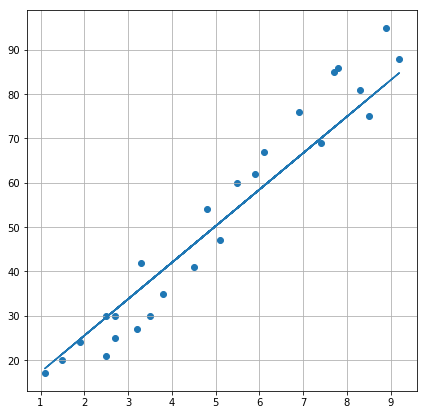

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(X, y)
plt.plot(X,bestfit_line);
plt.grid()
plt.show()



# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
y_pred = reg.predict(X_test)  ##predict score on X_test therefore we pass X_test and store results into predict_score variabl

In [15]:
y_pred

array([82.3213424 , 35.41105506, 54.33976749, 73.26847993, 37.88001755,
       46.10989252, 51.0478175 , 48.57885501, 29.65014258, 24.71221759,
       29.65014258, 77.38341742, 18.12831761, 57.63171748, 36.23404255,
       40.34898004, 84.79030489, 31.29611757, 72.44549243, 65.86159245])

In [16]:
## we create 2 empty list and append the actual values and predicted values which are in arrey format into two different lists 

list2=[]
for i in y_pred:
   list2.append(i)

list1=[]
for i in y_test:
   list1.append(i)

In [17]:
## created a data frame from above list for actual and predicted values 

df3= pd.DataFrame({'Actual':list1, 'Predicted':list2})

In [18]:
df3

,Actual,Predicted
0,95,82.321342
1,27,35.411055
2,60,54.339767
3,86,73.268480
4,30,37.880018
5,41,46.109893
6,47,51.047818
7,54,48.578855
8,30,29.650143
9,24,24.712218


In [29]:
hours = 6.5
predict_for_hours = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_for_hours[0]))

No of Hours = 6.5
Predicted Score = 62.56964246545295


# Plotting the actual values and predicted values

In [19]:
## preparin the data for ploting ,we use 20 data poins because the afte train test split we get 20:80 ration 
## and for ploting we need same data poins on x and y 

X1=df.iloc[0:20,:-1].values

In [20]:
## sorting the  values

X2= sorted(X1,key = lambda x:float(x))

In [21]:
y1=np.sort(y_test)
y2=np.sort(y_pred)

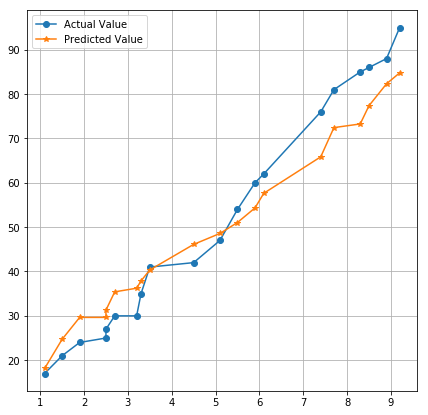

In [22]:
## plotting the actual values and predicted values

plt.figure(figsize=(7,7))
plt.plot(X2,y1,marker='o',label = "Actual Value")
plt.plot(X2,y2,marker='*',label = "Predicted Value")
plt.legend(loc=2)
plt.grid()
plt.show()

No of Hours = 6.5
Predicted Score = 62.56964246545295


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well 
different algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. There are many such metrics.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.203970168896691
